In [67]:
# Regressão Logística
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

ARQ = '../data/raw/Eleicao.csv'

df = pd.read_csv(ARQ, sep = ';')
df.head()

,CANDIDATO,SITUACAO,DESPESAS
0,George Turner,0,10
1,Victor Johnson,0,100
2,Jerry Perry,1,1600
3,Shirley Cook,1,1500
4,Carolyn Bailey,1,3300


In [5]:
df.shape

(47, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CANDIDATO  47 non-null     object
 1   SITUACAO   47 non-null     int64 
 2   DESPESAS   47 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [4]:
df.describe()

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


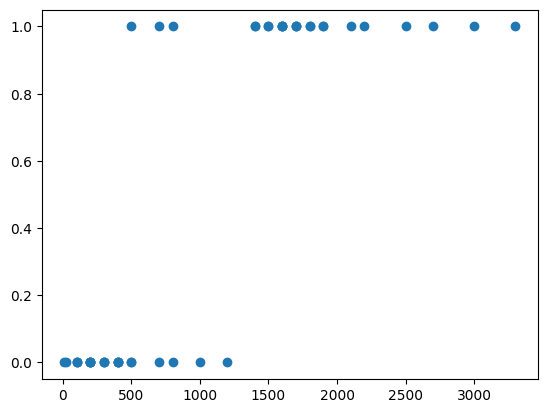

In [ ]:
plt.scatter(df.DESPESAS, df.SITUACAO) # 0 não foi eleito, 1 foi eleito

In [9]:
np.corrcoef(df.DESPESAS, df.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [24]:
# Criando as variáveis X e Y (variável independente e variável dependente)
# Transformação de X para o formato de matriz adicionando um novo eixo (newaxis)
# X = df[['DESPESAS']].values
X = df.iloc[:, 2].values
X = X[:, np.newaxis]
# Y = df[['SITUACAO']].values
Y = df.iloc[:, 1].values
X

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]])

In [27]:
# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X, Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
modelo.coef_

array([[0.00498364]])

In [29]:
modelo.intercept_

array([-4.60287217])

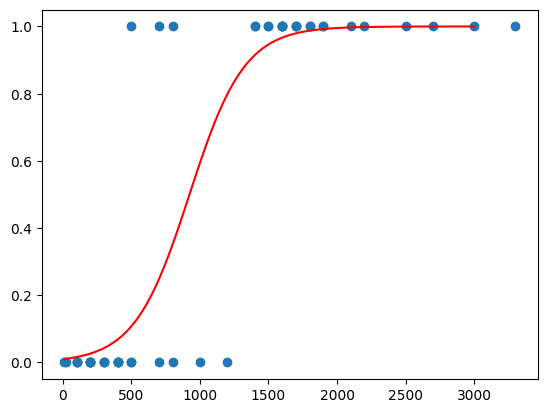

In [44]:
plt.scatter(X , Y)
# Criando novos dados para gerar a função sigmoide
X_teste = np.linspace(10, 3000, 100)

# Implementação da função sigmoide
def model(x):
    return 1 / (1 + np.exp(-x))

# Gerando previsões e visualização dos resultados
r = model(X_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(X_teste, r, color = 'red')

In [84]:
# Carregando base de dados com novos candidatos
ARQ2 = '../data/raw/NovosCandidatos.csv'

df2 = pd.read_csv(ARQ2, sep = ';')
df2

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


In [85]:
# Mudando os dados para formato de matriz
despesas = df2.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)

# Previsões e gerando nova base de dados com os valores originais e as previsões
previsoes = modelo.predict(despesas)
previsoes

array([0, 0, 0, 0, 0, 1, 1])

In [ ]:
previsoes_prob = modelo.predict_proba(despesas) # Pegando a probabilidade de ser eleito
np.set_printoptions(suppress=True)

qtd_candidatos = len(df2)
prob_eleito = previsoes_prob[:, 1]

print(f'Probabilidade de cada candidato ser eleito:')
for i in range(qtd_candidatos):

    candidato = i
    probabilidade = prob_eleito[i]
    
    print(f'Candidato {candidato}: {probabilidade:.2%}')

Probabilidade de cada candidato ser eleito:
Candidato 0: 0.99%
Candidato 1: 1.04%
Candidato 2: 2.64%
Candidato 3: 10.80%
Candidato 4: 47.06%
Candidato 5: 94.65%
Candidato 6: 100.00%


In [ ]:
df2['probabilidade'] = prob_eleito

df2['previsao_final'] = modelo.predict(despesas)

print(df2)

  CANDIDATO  DESPESAS  Probabilidade  Previsao_Final
0         A         0          0.99%               0
1         B        10          1.04%               0
2         C       200          2.64%               0
3         D       500         10.80%               0
4         E       900         47.06%               0
5         F      1500         94.65%               1
6         G      3000        100.00%               1


In [87]:
df2.columns = df2.columns.str.lower()

In [88]:
df2

,candidato,despesas,probabilidade,previsao_final
0,A,0,0.99%,0
1,B,10,1.04%,0
2,C,200,2.64%,0
3,D,500,10.80%,0
4,E,900,47.06%,0
5,F,1500,94.65%,1
6,G,3000,100.00%,1
